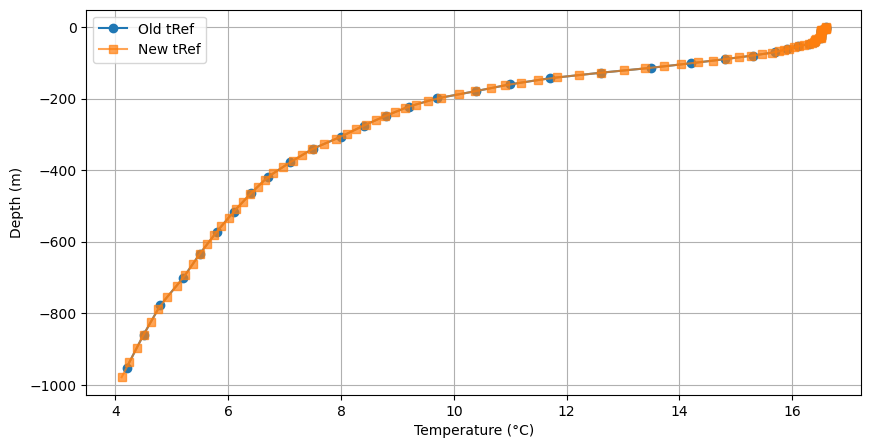

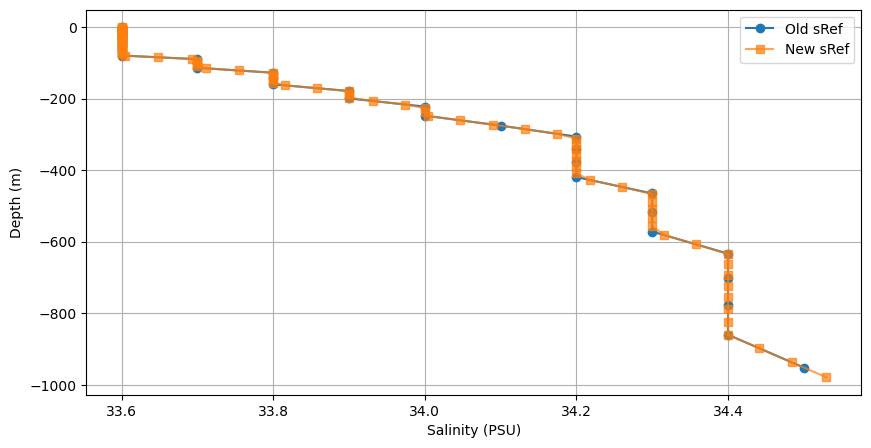


New tRef:
16.6, 16.6, 16.6, 16.6, 16.6, 16.58, 16.53, 16.5, 16.5, 16.5, 
16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 
16.47, 16.42, 16.4, 16.4, 16.39, 16.34, 16.29, 16.2, 16.11, 16.03, 
15.94, 15.85, 15.76, 15.64, 15.46, 15.28, 15.06, 14.84, 14.59, 14.32, 
14.03, 13.73, 13.4, 13.01, 12.61, 12.22, 11.83, 11.5, 11.2, 10.91, 
10.65, 10.38, 10.09, 9.78, 9.54, 9.33, 9.13, 8.96, 8.78, 8.62, 
8.44, 8.27, 8.1, 7.91, 7.7, 7.48, 7.32, 7.14, 6.97, 6.8, 
6.65, 6.52, 6.39, 6.26, 6.13, 6.01, 5.88, 5.75, 5.63, 5.49, 
5.37, 5.24, 5.09, 4.92, 4.76, 4.63, 4.5, 4.38, 4.25, 4.11, 

New sRef:
33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.65, 33.69, 33.7, 33.7, 
33.7, 33.7, 33.71, 33.75, 33.8, 33.8, 33.8, 33.8, 33.8, 33.82, 
33.86, 33.9, 33.9, 33.9, 33.93, 33.97, 34.0, 34.0, 34.0, 34.05, 
34.09, 34.13, 34.18, 34.2, 34

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Your old reference temperature and salinity profiles
tRef_old = np.array([16.6, 16.6, 16.6, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5,
                      16.5, 16.4, 16.4, 16.3, 16.1, 15.9, 15.7, 15.3,
                      14.8, 14.2, 13.5, 12.6, 11.7, 11.0, 10.4, 9.7,
                      9.2, 8.8, 8.4, 8.0, 7.5, 7.1, 6.7, 6.4,
                      6.1, 5.8, 5.5, 5.2, 4.8, 4.5, 4.2])

sRef_old = np.array([33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6,
                      33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6,
                      33.7, 33.7, 33.7, 33.8, 33.8, 33.8, 33.9, 33.9,
                      34.0, 34.0, 34.1, 34.2, 34.2, 34.2, 34.2, 34.3,
                      34.3, 34.3, 34.4, 34.4, 34.4, 34.4, 34.5])

# Old delR configuration (sum of delR defines depth levels)
delR_old = np.array([2.0, 2.2, 2.4, 2.7, 3.0, 3.3, 3.6, 4.0, 4.4,
                     4.9, 5.4, 6.0, 6.6, 7.3, 8.0, 8.9, 9.8,
                     10.8, 12.0, 13.2, 14.6, 16.1, 17.8, 19.7, 21.7,
                     24.0, 26.5, 29.3, 32.3, 35.7, 39.4, 43.6, 48.1,
                     53.1, 58.7, 64.8, 71.6, 79.1, 87.1, 96.3])

# Compute old depth levels
R_old_faces = np.zeros(len(delR_old) + 1)
R_old_faces[1:] = np.cumsum(delR_old)
RC_old = (R_old_faces[:-1] + R_old_faces[1:]) / 2  # Cell centers

# New delR configuration
delR_new = np.array([1.0, 1.0, 1.1, 1.1, 1.2, 1.2, 1.3, 1.3, 1.4, 
1.5, 1.5, 1.6, 1.7, 1.7, 1.8, 1.9, 2.0, 
2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 
2.9, 3.0, 3.1, 3.2, 3.4, 3.5, 3.7, 3.8, 
4.0, 4.2, 4.4, 4.5, 4.7, 4.9, 5.2, 5.4, 
5.6, 5.8, 6.1, 6.4, 6.6, 6.9, 7.2, 7.5, 
7.8, 8.2, 8.5, 8.9, 9.3, 9.7, 10.1, 10.5, 
11.0, 11.4, 11.9, 12.5, 13.0, 13.5, 14.1, 14.7, 
15.4, 16.0, 16.7, 17.4, 18.2, 19.0, 19.8, 20.6, 
21.5, 22.4, 23.4, 24.4, 25.4, 26.5, 27.7, 28.9, 
30.1, 31.4, 32.7, 34.2, 35.6, 37.1, 38.7, 40.5, 
42.2, ])

# Compute new depth levels
R_new_faces = np.zeros(len(delR_new) + 1)
R_new_faces[1:] = np.cumsum(delR_new)
RC_new = (R_new_faces[:-1] + R_new_faces[1:]) / 2  # New cell centers

# Interpolate old profiles to new depth levels
T_interp = interp1d(RC_old, tRef_old, bounds_error=False, fill_value="extrapolate")
S_interp = interp1d(RC_old, sRef_old, bounds_error=False, fill_value="extrapolate")

tRef_new = T_interp(RC_new)
sRef_new = S_interp(RC_new)

# Plot old vs. new profiles
plt.figure(figsize=(10, 5))
plt.plot(tRef_old, -RC_old, "o-", label="Old tRef")
plt.plot(tRef_new, -RC_new, "s-", label="New tRef", alpha=0.7)
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(sRef_old, -RC_old, "o-", label="Old sRef")
plt.plot(sRef_new, -RC_new, "s-", label="New sRef", alpha=0.7)
plt.xlabel("Salinity (PSU)")
plt.ylabel("Depth (m)")
plt.legend()
plt.grid()
plt.show()

# Print new reference profiles for MITgcm
print("\nNew tRef:")
for i, t in enumerate(np.round(tRef_new, 2)):
    print(f"{t},", end=" ")
    if (i + 1) % 10 == 0:
        print("")

print("\nNew sRef:")
for i, s in enumerate(np.round(sRef_new, 2)):
    print(f"{s},", end=" ")
    if (i + 1) % 10 == 0:
        print("")


In [3]:
len([16.6, 16.6, 16.6, 16.6, 16.6, 16.56, 16.51, 16.5, 16.5, 16.5, 
16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.45, 16.4, 
16.4, 16.38, 16.33, 16.24, 16.13, 16.01, 15.9, 15.78, 15.63, 15.4, 
15.14, 14.85, 14.52, 14.16, 13.76, 13.3, 12.78, 12.26, 11.73, 11.32, 
10.92, 10.57, 10.19, 9.78, 9.47, 9.18, 8.95, 8.71, 8.48, 8.24, 
8.0, 7.72, 7.44, 7.2, 6.97, 6.73, 6.55, 6.37, 6.19, 6.02, 
5.84, 5.66, 5.48, 5.31, 5.11, 4.87, 4.68, 4.5, 4.32, 4.14])

70

In [3]:
len(tRef_new)

50